In [1]:
import pandas as pd
import json
import numpy as np
import math
from matplotlib import pyplot as plt
import itertools as it

In [2]:
import json

data = []
with open('./yelp_academic_dataset_user.json',encoding="utf8") as f:
    for line in f:
        data.append(json.loads(line))


In [3]:
avg_stars = []
for i in range(len(data)):
    avg_stars.append(data[i]['average_stars'])
# average stars has the data of average stars each user rate


In [4]:
review_count = []
for i in range(len(data)):
    review_count.append(data[i]['review_count'])
# review_count has the data of the number of reviews of each yelp user


In [5]:
num_friend = []
for i in range(len(data)):
    friendlist = data[i]['friends'].split(', ')
    num_friend.append(len(friendlist))
# num_friend has the data of the number of friends each user had on their Yelp account

In [6]:
text_list = [0]*10

for i in review_count:
    if i in range(0,31):
        text_list[0] +=1
    elif i in range(31,61):
        text_list[1] +=1
    elif i in range(61,91):
        text_list[2] +=1
    elif i in range(91,121):
        text_list[3] +=1
    elif i in range(121,151):
        text_list[4] +=1
    elif i in range(151,181):
        text_list[5] +=1
    elif i in range(181,211):
        text_list[6] +=1
    elif i in range(211,241):
        text_list[7] +=1
    elif i in range(241,271):
        text_list[8] +=1
    elif i in range(271,301):
        text_list[9] +=1
print(text_list)

[1688399, 134501, 50260, 26518, 16591, 11073, 8121, 5916, 4482, 3428]


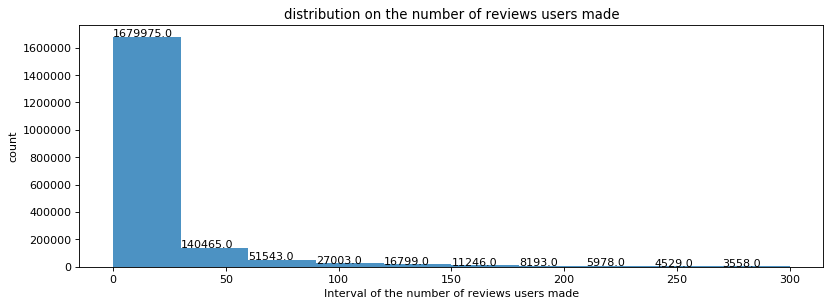

In [7]:
data = review_count

bins = np.linspace(0, 300,11)

plt.figure(num=None, figsize=(12, 4), dpi=80)
arr=plt.hist(data, bins=bins, alpha = 0.8)
for i in range(10):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.title('distribution on the number of reviews users made')
plt.xlabel('Interval of the number of reviews users made')
plt.ylabel('count')

plt.show()



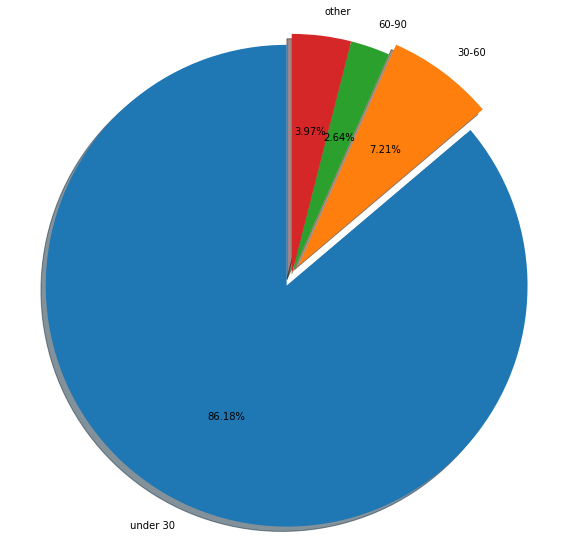

In [8]:
rest = 0
for i in range(3,10):
    rest += arr[0][i] 
labels = 'under 30','30-60','60-90','other'
sizes = [arr[0][0],arr[0][1],arr[0][2],rest]
explode = (0.05,0.05,0,0)
fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(sizes, explode=explode,labels = labels, autopct = '%1.2f%%',shadow=True, startangle = 90)
ax1.axis('equal')
plt.show()

Text(0, 0.5, 'count')

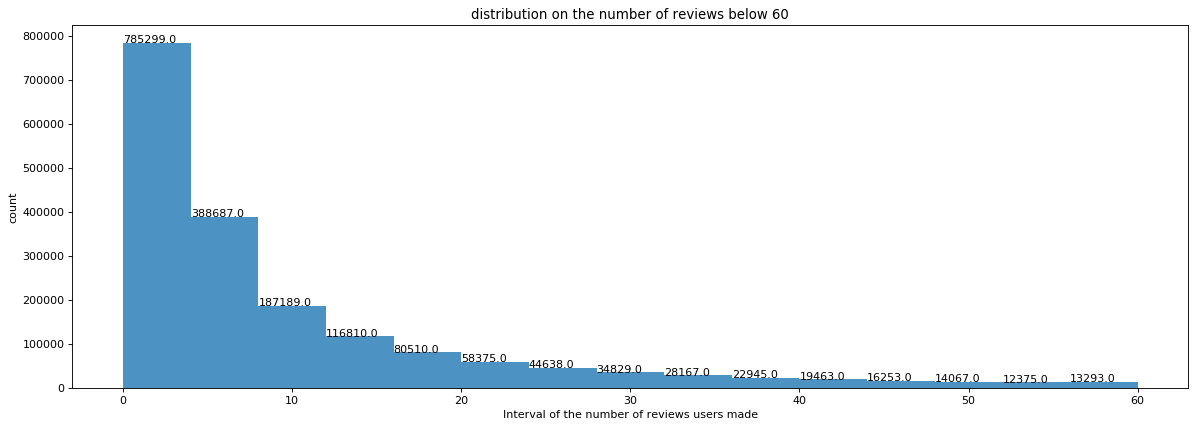

In [9]:
new_bins = np.linspace(0,60,16)
plt.figure(num=None, figsize=(18, 6), dpi=80)
arr2= plt.hist(data, bins=new_bins,alpha=0.8)
for i in range(15):
    plt.text(arr2[1][i],arr2[0][i],str(arr2[0][i]))
plt.title('distribution on the number of reviews below 60')
plt.xlabel('Interval of the number of reviews users made')
plt.ylabel('count')


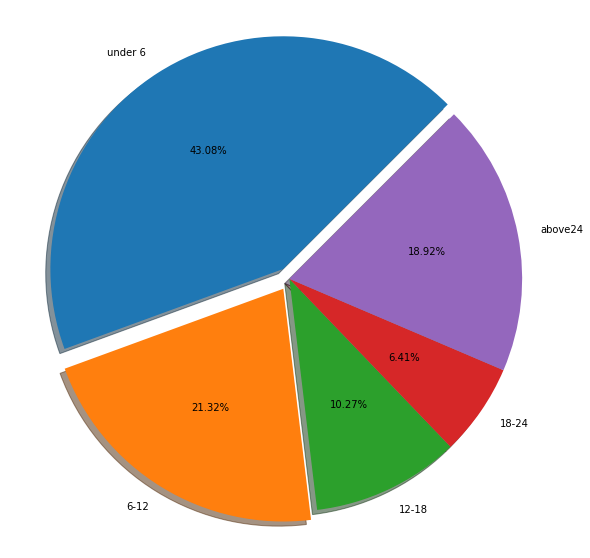

In [10]:
rest2 = 0
for i in range(4,15):
    rest2 += arr2[0][i] 
labels = 'under 6','6-12','12-18','18-24','above24'
sizes = [arr2[0][0],arr2[0][1],arr2[0][2],arr2[0][3],rest2]
explode = (0.05,0.05,0,0,0)
fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(sizes, explode=explode,labels = labels, autopct = '%1.2f%%',shadow=True, startangle = 45)
ax1.axis('equal')
plt.show()

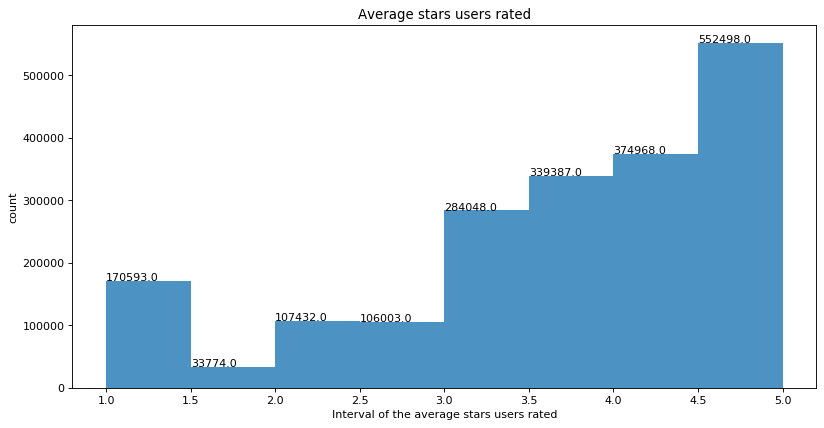

3.648086821628249

In [11]:
star_data = avg_stars

bins = np.linspace(1,5,9)

plt.figure(num=None, figsize=(12, 6), dpi=80)
arr3=plt.hist(star_data, bins=bins, alpha = 0.8)
for i in range(8):
    plt.text(arr3[1][i],arr3[0][i],str(arr3[0][i]))
plt.title('Average stars users rated')
plt.xlabel('Interval of the average stars users rated')
plt.ylabel('count')

plt.show()
np.mean(star_data)

In [12]:
pair=[]
for i in range(len(avg_stars)):
    pair.append((review_count[i],avg_stars[i]))
len(pair)

1968703

In [13]:
stat_30 = [0]*8
stat_60 = [0]*8
stat_g60 = [0]*8
for i in pair:
    if (i[1]>=1 and i[1] <1.5) and int(i[0]) <30:
        stat_30[0]+=1
    elif (i[1]>=1 and i[1] <1.5) and (i[0] >=30 and i[0] <=60):
        stat_60[0]+=1
    elif (i[1]>=1 and i[1] <1.5) and i[0] >60:
        stat_g60[0]+=1
    elif (i[1]>=1.5 and i[1] <2) and i[0] <30:
        stat_30[1]+=1
    elif (i[1]>=1.5 and i[1] <2) and (i[0] >=30 and i[0] <=60):
        stat_60[1]+=1
    elif (i[1]>=1.5 and i[1] <2) and i[0] >60:
        stat_g60[1]+=1
    elif (i[1]>=2.0 and i[1] <2.5) and i[0] <30:
        stat_30[2]+=1
    elif (i[1]>=2.0 and i[1] <2.5) and (i[0] >=30 and i[0] <=60):
        stat_60[2]+=1
    elif (i[1]>=2.0 and i[1] <2.5) and i[0] >60:
        stat_g60[2]+=1
    elif (i[1]>=2.5 and i[1] <3.0) and i[0] <30:
        stat_30[3]+=1
    elif (i[1]>=2.5 and i[1] <3.0) and (i[0] >=30 and i[0] <=60):
        stat_60[3]+=1
    elif (i[1]>=2.5 and i[1] <3.0) and i[0] >60:
        stat_g60[3]+=1
    elif (i[1]>=3.0 and i[1] <3.5) and i[0] <30:
        stat_30[4]+=1
    elif (i[1]>=3.0 and i[1] <3.5) and (i[0] >=30 and i[0] <=60):
        stat_60[4]+=1
    elif (i[1]>=3.0 and i[1] <3.5) and i[0] >60:
        stat_g60[4]+=1
    elif (i[1]>=3.5 and i[1] <4.0) and i[0] <30:
        stat_30[5]+=1
    elif (i[1]>=3.5 and i[1] <4.0) and (i[0] >=30 and i[0] <=60):
        stat_60[5]+=1
    elif (i[1]>=3.5 and i[1] <4.0) and i[0] >60:
        stat_g60[5]+=1
    elif (i[1]>=4.0 and i[1] <4.5) and i[0] <30:
        stat_30[6]+=1
    elif (i[1]>=4.0 and i[1] <4.5) and (i[0] >=30 and i[0] <=60):
        stat_60[6]+=1
    elif (i[1]>=4.0 and i[1] <4.5) and i[0] >60:
        stat_g60[6]+=1
    elif (i[1]>=4.5 and i[1] <=5.0) and i[0] <30:
        stat_30[7]+=1
    elif (i[1]>=4.5 and i[1] <=5.0) and (i[0] >=30 and i[0] <=60):
        stat_60[7]+=1
    elif (i[1]>=4.5 and i[1] <=5.0) and i[0] >60:
        stat_g60[7]+=1

In [14]:
sum(stat_30)+sum(stat_60)+sum(stat_g60)


1968703

In [15]:
stat_g60

[32, 237, 1098, 5327, 23877, 65467, 43312, 6453]

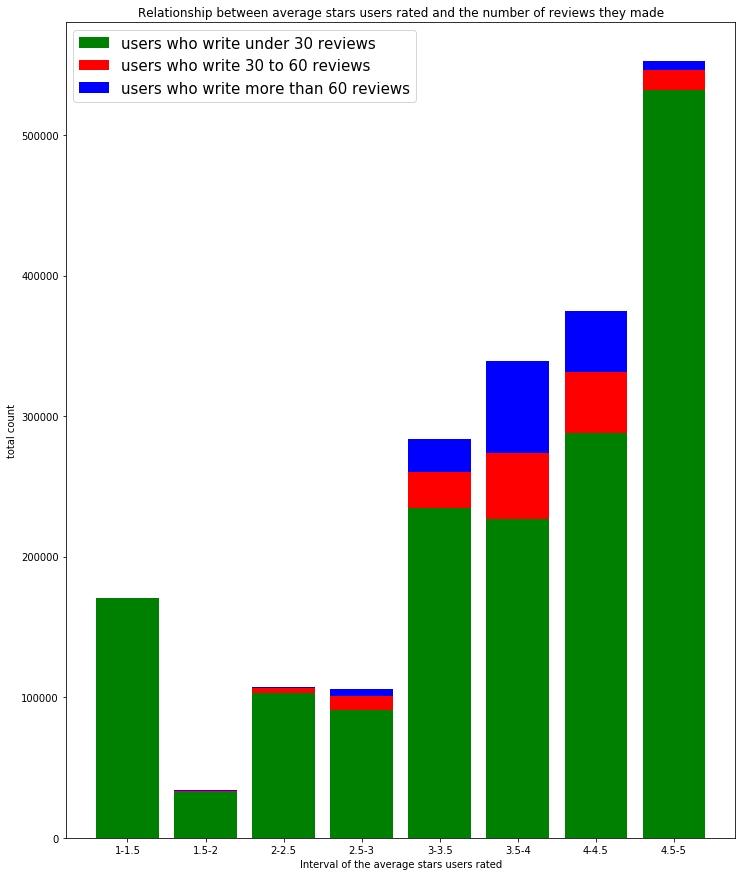

In [16]:
bars = np.add(stat_30,stat_60).tolist()
labels = ['1-1.5','1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
fig, ax = plt.subplots(figsize=(12,15))
ax.bar(labels,stat_30,color = 'g',label='users who write under 30 reviews')
ax.bar(labels,stat_60,color = 'r',bottom = stat_30,label='users who write 30 to 60 reviews')
ax.bar(labels,stat_g60,color = 'b',bottom = bars,label = 'users who write more than 60 reviews')
plt.title('Relationship between average stars users rated and the number of reviews they made')
plt.xlabel('Interval of the average stars users rated')
plt.ylabel('total count')
plt.legend(prop={'size':15})
plt.show()

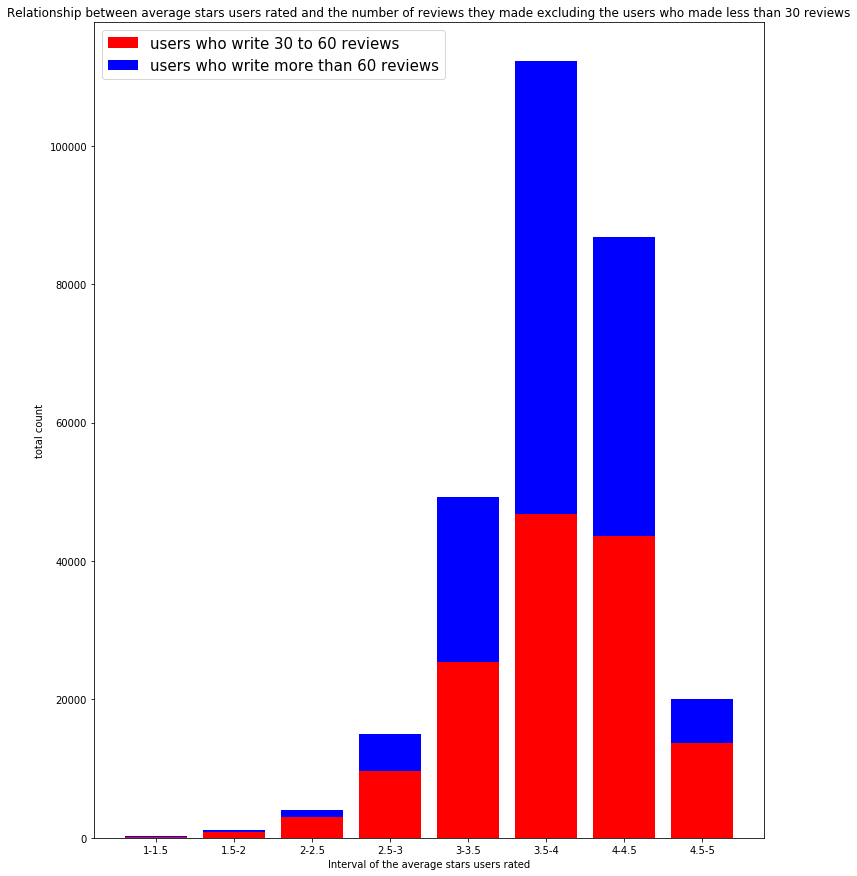

In [17]:
bars = np.add(stat_30,stat_60).tolist()
labels = ['1-1.5','1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
fig, ax = plt.subplots(figsize=(12,15))
ax.bar(labels,stat_60,color = 'r',label='users who write 30 to 60 reviews')
ax.bar(labels,stat_g60,color = 'b',bottom = stat_60,label = 'users who write more than 60 reviews')
plt.legend(prop={'size':15})
plt.title('Relationship between average stars users rated and the number of reviews they made excluding the users who made less than 30 reviews')
plt.xlabel('Interval of the average stars users rated')
plt.ylabel('total count')
plt.show()

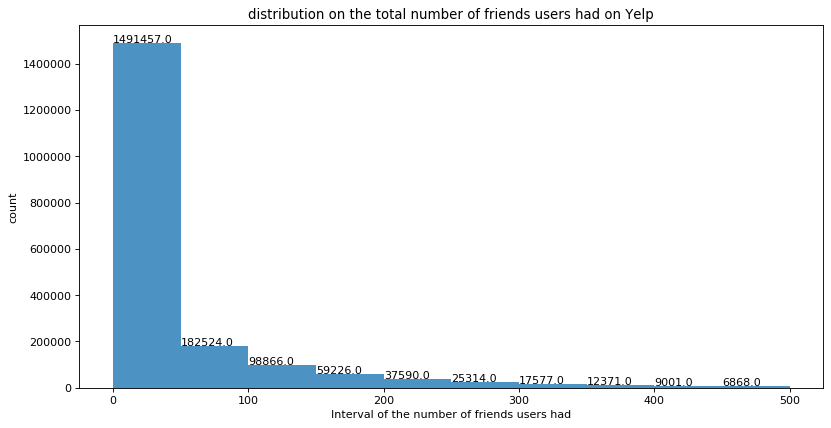

In [18]:
bins = np.linspace(0, 500,11)

plt.figure(num=None, figsize=(12, 6), dpi=80)
arr4=plt.hist(num_friend, bins=bins, alpha = 0.8)
for i in range(10):
    plt.text(arr4[1][i],arr4[0][i],str(arr4[0][i]))
plt.title('distribution on the total number of friends users had on Yelp')
plt.xlabel('Interval of the number of friends users had')
plt.ylabel('count')

plt.show()

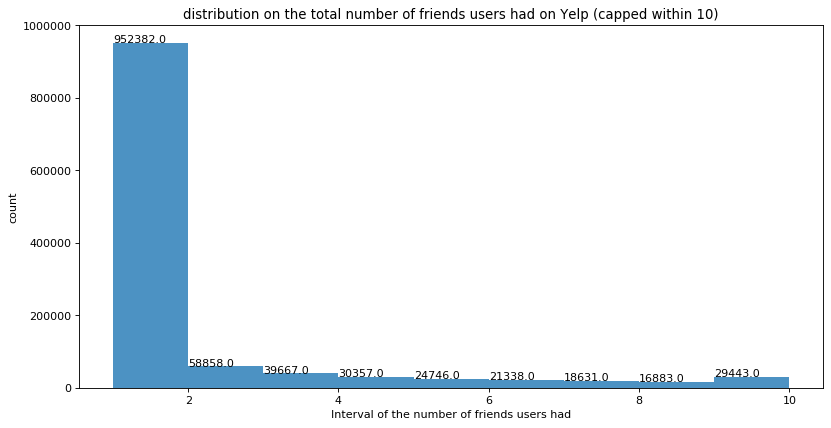

In [19]:
bins = np.linspace(1, 10,10)

plt.figure(num=None, figsize=(12, 6), dpi=80)
arr5=plt.hist(num_friend, bins=bins, alpha = 0.8)
for i in range(9):
    plt.text(arr5[1][i],arr5[0][i],str(arr5[0][i]))
plt.title('distribution on the total number of friends users had on Yelp (capped within 10)')
plt.xlabel('Interval of the number of friends users had')
plt.ylabel('count')

plt.show()

In [20]:
percent = (952382/len(num_friend))*100

In [21]:
print('the percentage that users have only one friend on Yelp is '+ "{:.2f}".format(percent))

the percentage that users have only one friend on Yelp is 48.38


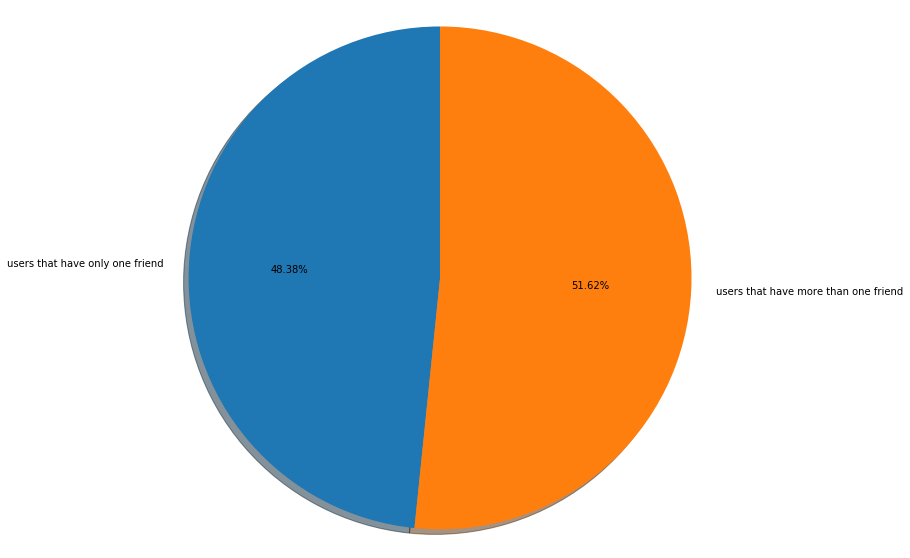

In [22]:
sizes = [952382,len(num_friend)-952382]
explode = (0,0)
labels = 'users that have only one friend','users that have more than one friend'
fig1, ax1 = plt.subplots(figsize=(10,10))

ax1.pie(sizes, explode=explode,labels = labels, autopct = '%1.2f%%',shadow=True, startangle = 90)
ax1.axis('equal')
plt.show()